# Problem Definition
In this Reinforcement Learning framework for trading strategy, the algorithm takes an action (buy, sell or hold) depending upon the current state of the stock price. The algorithm is trained using Q-Learning framework, to help us predict the best action, based on the current stock prices.

### The key components of the RL based framework are :

**Agent**: Trading agent.

**Action:** Buy, sell or hold.

**Reward function:** Realized profit and loss (PnL) is used as the reward function for this case study. The reward depends upon the action:

**Sell:** Realized profit and loss (sell price - bought price)

**Buy:** No reward

**Hold:** No Reward

**State:** Differences of past stock prices for a given time window is used as the state.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Libraries and Data

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random


#Import Model Packages for reinforcement learning
from keras import layers, models, optimizers
from keras import backend as K
from collections import namedtuple, deque

In [3]:
#The data already obtained from yahoo finance is imported.
dataset = read_csv('/content/drive/MyDrive/REL301m/data_new/VCB_new.csv',index_col=0)
#acb = read_csv('/content/drive/MyDrive/REL301m/data_new/ACB_new.csv',index_col=0)
#fpt = read_csv('/content/drive/MyDrive/REL301m/data_new/FPT_new.csv',index_col=0)
#vcb = read_csv('/content/drive/MyDrive/REL301m/data_new/VCB_new.csv',index_col=0)

In [4]:
dataset

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-11-03 00:00:00+00:00,13861.64453,13861.64453,13861.64453,13566.71582,13615.87109,1183443
2014-11-04 00:00:00+00:00,13517.56152,13517.56152,13861.64453,13517.56152,13861.64453,2059858
2014-11-05 00:00:00+00:00,13468.40625,13468.40625,13566.71582,13419.25195,13566.71582,426629
2014-11-06 00:00:00+00:00,13370.09668,13370.09668,13517.56152,13320.94238,13468.40625,258914
2014-11-07 00:00:00+00:00,13370.09668,13370.09668,13615.87109,13271.78809,13271.78809,397843
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,91700.00000,91700.00000,92300.00000,91400.00000,92200.00000,755400
2024-10-25 00:00:00+00:00,91800.00000,91800.00000,92300.00000,91700.00000,92100.00000,1051301
2024-10-28 00:00:00+00:00,92000.00000,92000.00000,92300.00000,91500.00000,91500.00000,1129801


In [5]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
# shape
dataset.shape

(2487, 6)

In [8]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-11-03 00:00:00+00:00,13861.64453,13861.64453,13861.64453,13566.71582,13615.87109,1183443
2014-11-04 00:00:00+00:00,13517.56152,13517.56152,13861.64453,13517.56152,13861.64453,2059858
2014-11-05 00:00:00+00:00,13468.40625,13468.40625,13566.71582,13419.25195,13566.71582,426629
2014-11-06 00:00:00+00:00,13370.09668,13370.09668,13517.56152,13320.94238,13468.40625,258914
2014-11-07 00:00:00+00:00,13370.09668,13370.09668,13615.87109,13271.78809,13271.78809,397843


In [9]:
# describe data
# Set precision for DataFrame display
pd.set_option('display.precision', 3)

# Describe data
dataset.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2487.000,2487.000,2487.000,2487.000,2487.000,2.487e+03
mean,50642.850,50642.850,51203.400,50060.313,50616.121,2.025e+06
std,23674.751,23674.751,23868.456,23471.156,23682.074,1.629e+06
min,13075.169,13075.169,13370.097,13075.169,13075.169,7.401e+04
25%,25282.756,25282.756,25560.480,25076.305,25331.910,1.137e+06
50%,52025.406,52025.406,52556.277,51162.742,51759.973,1.645e+06
75%,67188.422,67188.422,68216.992,66215.070,67193.199,2.469e+06
max,97400.000,97400.000,100500.000,97300.000,98500.000,3.408e+07


<Axes: xlabel='Date'>

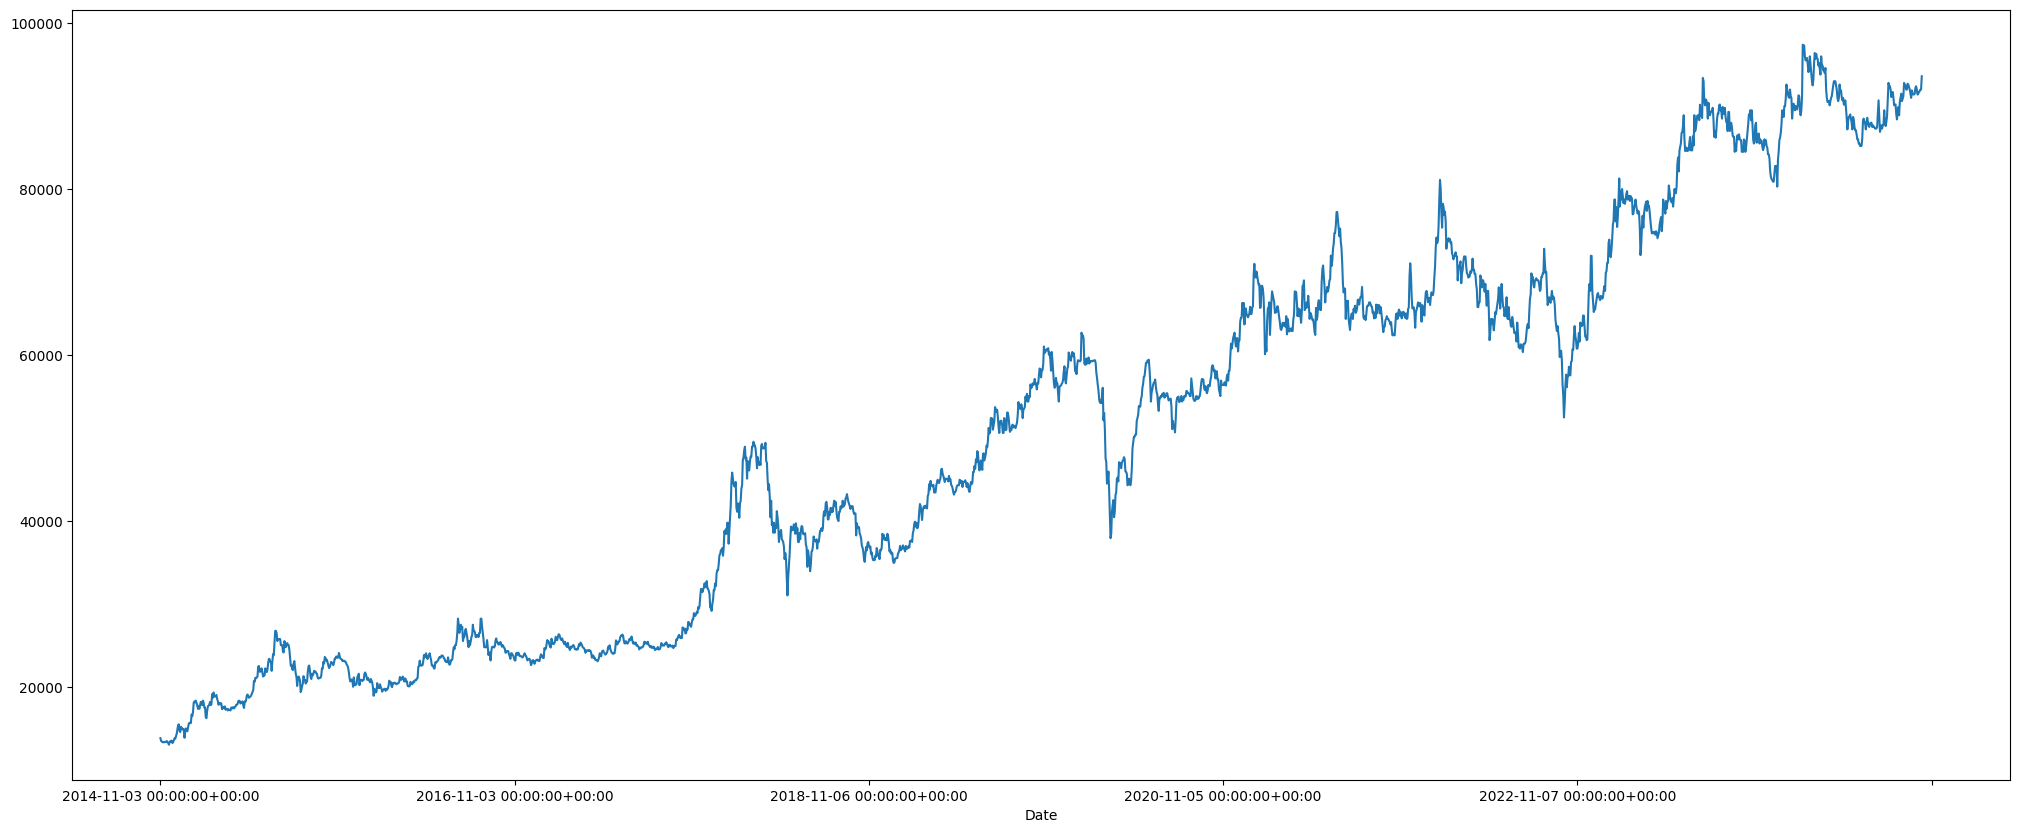

In [10]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
dataset['Close'].plot()

# Data Preprocessing

In [11]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [12]:
# Fill the missing values with the last value available in the dataset.
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-11-03 00:00:00+00:00,13861.645,13861.645,13861.645,13566.716,13615.871,1183443
2014-11-04 00:00:00+00:00,13517.562,13517.562,13861.645,13517.562,13861.645,2059858


#Training and Testing Data Split

In [13]:
X=list(dataset["Close"])
X=[float(x) for x in X]

In [14]:
validation_size = 0.2
#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [15]:
len(X_test)

498

In [ ]:
#train_size = int(len(X))
#test_size = int(len(Y))

#X_train, X_test = X[0:train_size], Y[0:test_size]

# Implementation Steps For Designing a Reinforcement learning model
•	Importing Libraries

•	Create the agent who will make all decisions

•	Define basic functions for formatting the values, sigmoid function, reading the data file, etc

•	Train the agent

•	Evaluate the agent performance


In [16]:
#Agent in the environment
import numpy as np
import random
from collections import deque
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import Adam

class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        self.state_size = state_size  #state vector size typically refers to the number of features or dimensions used to represent each state, not the number of data points.
        self.action_size = 3          #buy,sell,hold
        self.memory = deque(maxlen=1000)  # Initialize a memory buffer to store past experiences
        self.inventory = []                # Initialize an inventory to track bought stocks
        self.model_name = model_name       # Set the name of the model file to load or save
        self.is_eval = is_eval             # Flag to indicate if the agent is in evaluation mode
        self.gamma = 0.95                  # Set the discount factor for future rewards
        self.epsilon = 1.0                 # Set the exploration rate (epsilon) for epsilon-greedy strategy
        # self.epsilon_min = 0.01
        # self.epsilon_decay = 0.995
        self.model = load_model(model_name) if is_eval else self._model()

    def _model(self):
        model = Sequential()
        #add input layer
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        #add hidden layer
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        #add output layer
        model.add(Dense(self.action_size, activation="linear"))
        # Compile the model with mean squared error loss and Adam optimizer
        model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))
        return model

#epsilon-greedy approch is implemented to find action
    def act(self, state):
        # If in evaluation mode or with probability epsilon, choose a random action
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        #exploitation
        # Otherwise, predict Q-values for each action and choose the action with the highest Q-value
        options = self.model.predict(state)
        return np.argmax(options[0])


    # def expReplay(self, batch_size):
    #     mini_batch = []
    #     l = len(self.memory)
    #     for i in range(l - batch_size + 1, l):
    #         mini_batch.append(self.memory[i])

    #     for state, action, reward, next_state, done in mini_batch:
    #         target = reward
    #         if not done:
    #             target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
    #         target_f = self.model.predict(state)
    #         target_f[0][action] = target
    #         self.model.fit(state, target_f, epochs=1, verbose=0)

    #     if self.epsilon > self.epsilon_min:
    #         self.epsilon *= self.epsilon_decay


In [17]:
#Helper functions
import numpy as np
import math

# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

# # returns the vector containing stock data from a fixed file
# def getStockData(key):
#     vec = []
#     lines = open("data/" + key + ".csv", "r").read().splitlines()

#     for line in lines[1:]:
#         vec.append(float(line.split(",")[4])) #Only Close column

#     return vec

# returns the sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# returns an an n-day state representation ending at time t
#This ensures that the state representation always consists of n consecutive closing prices,
# even if it requires padding with the initial closing price.
def getState(data, t, n): # n is window size and t is at time t
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
    #block is which is the for [1283.27002, 1283.27002]
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))
    return np.array([res])

# Plots the behavior of the output
def plot_behavior(data_input, states_buy, states_sell, profit):
    fig = plt.figure(figsize = (15,5))
    plt.plot(data_input, color='r', lw=2.)
    plt.plot(data_input, '^', markersize=10, color='m', label = 'Buying signal', markevery = states_buy)
    plt.plot(data_input, 'v', markersize=10, color='k', label = 'Selling signal', markevery = states_sell)
    plt.title('Total gains: %f'%(profit))
    plt.legend()
    #plt.savefig('output/'+name+'.png')
    plt.show()

# Training

In [ ]:
#Training

window_size = 10
agent = Agent(window_size)
#In this step we feed the closing value of the stock price
data = X_train
l = len(data) - 1
#
batch_size = 32
#An episode represents a complete pass over the data.
episode_count = 1000

# Khởi tạo biến lưu trữ episode với total_profit cao nhất
highest_profit = float('-inf')
best_episode = -1

# Tạo danh sách để lưu trữ thông tin số giao dịch và total_profit của mỗi tập
transaction_counts = []

for e in range(episode_count + 1):
    print("Running episode " + str(e) + "/" + str(episode_count))
    state = getState(data, 0, window_size + 1) #agent observes current state
    total_profit = 0
    agent.inventory = []
    states_sell = []
    states_buy = []

    for t in range(l):
        action = agent.act(state)    # selects an action based on current state
        next_state = getState(data, t + 1, window_size + 1)
        reward = 0

        if action == 1:  # buy
            agent.inventory.append(data[t])
            states_buy.append(t)

        elif action == 2 and len(agent.inventory) > 0:  # sell
            bought_price = agent.inventory.pop(0)
            reward = max(data[t] - bought_price, 0)
            total_profit += data[t] - bought_price
            states_sell.append(t)

        done = True if t == l - 1 else False
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state

        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")
            plot_behavior(data, states_buy, states_sell, total_profit)

    # Cập nhật tập với total_profit cao nhất
    if total_profit > highest_profit:
        highest_profit = total_profit
        best_episode = e

    # Tính tổng số giao dịch trong tập hiện tại và lưu trữ trong danh sách
    transaction_count = len(states_buy) + len(states_sell)
    transaction_counts.append((e, transaction_count, total_profit))

    # Lưu mô hình sau mỗi 2 tập
    if e % 2 == 0:
        agent.model.save("/content/drive/MyDrive/REL301m/checkpoint/data_new/FPT_new/model_ep" + str(e) + ".keras")

# Sau khi hoàn tất tất cả các tập huấn luyện, in ra tập có total_profit cao nhất
print(f"The episode with the highest profit is {best_episode} with a profit of {formatPrice(highest_profit)}")

# Sắp xếp transaction_counts theo số lượng giao dịch giảm dần và in ra top 10
top_transactions = sorted(transaction_counts, key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 episodes with the most transactions:")
for episode, count, profit in top_transactions:
    print(f"Episode {episode}: {count} transactions, Total Profit: {formatPrice(profit)}")

Output hidden; open in https://colab.research.google.com to view.

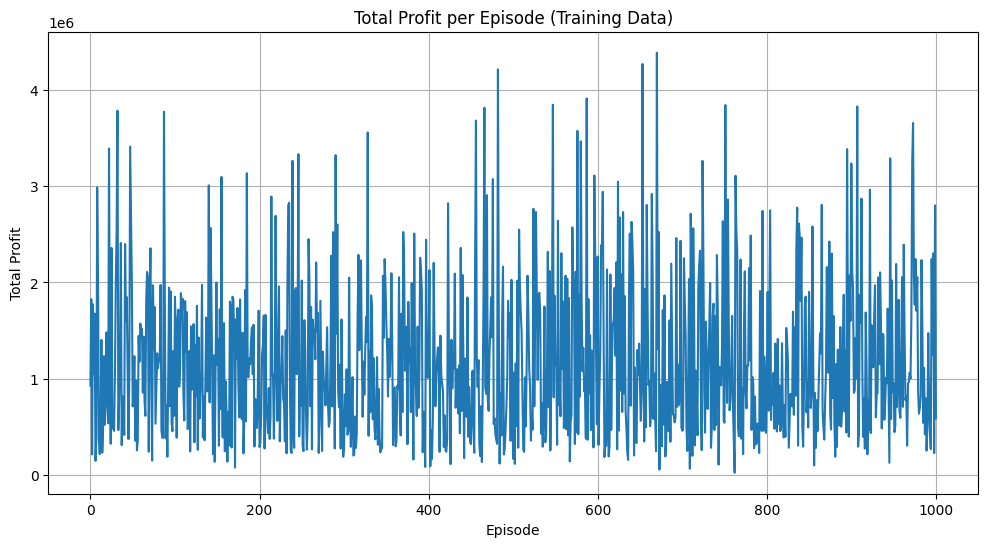

Accuracy on training data: 100.00%


In [ ]:
# prompt: đánh giá accuracy nó bao nhiêu với biểu đồ 1000 episode trên tập train bên trên dựa vào phương pháp Độ chính xác (Accuracy): độ đo của bài toán phân loại đơn giản nhất, tính toán bằng cách lấy số dự đoán đúng chia cho toàn bộ các dự đoán. Nhược điểm của cách đánh giá này là chỉ cho biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất hay dữ liệu của lớp nào thường bị phân loại nhầm nhất vào các lớp khác

import matplotlib.pyplot as plt

# Assuming 'transaction_counts' is available from the previous code
# transaction_counts = [(episode_number, transaction_count, total_profit), ...]

episodes = [item[0] for item in transaction_counts]
profits = [item[2] for item in transaction_counts]

plt.figure(figsize=(12, 6))
plt.plot(episodes, profits)
plt.xlabel("Episode")
plt.ylabel("Total Profit")
plt.title("Total Profit per Episode (Training Data)")
plt.grid(True)
plt.show()

# Calculate accuracy (assuming a profit > 0 is a "correct" prediction)
correct_predictions = sum(1 for profit in profits if profit > 0)
accuracy = (correct_predictions / len(profits)) * 100

print(f"Accuracy on training data: {accuracy:.2f}%")

In [ ]:
#Q-Learning Model
print(agent.model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

None


# Testing

In [18]:
#agent is already defined in the training set above.
test_data = X_test
data = X_train
window_size = 10
l_test = len(test_data) - 1
state = getState(test_data, 0, window_size + 1)  #Initializes the state by calling the getState function with the test data, starting at index 0, and a window size of window_size + 1
total_profit = 0  #initilaize profit
is_eval = True    #Indicates that the agent is in evaluation mode.
done = False       # Indicates whether the evaluation is complete or not.
#Initialize empty lists to store the indices where the agent decides to sell or buy during evaluation.
states_sell_test = []
states_buy_test = []
#Get the trained model
#model_name = "/content/drive/MyDrive/REL301m/checkpoint/data_new/FPT_new/model_ep" + str(e) + ".keras"
model_name = "/content/drive/MyDrive/REL301m/checkpoint/data_new/FPT_new/model_ep356" + ".keras"
agent = Agent(window_size, is_eval, model_name)
state = getState(data, 0, window_size + 1)
total_profit = 0
agent.inventory = [] #Resets the agent's inventory for evaluation.

In [19]:
#Sharpe ratio based on the test data and total profit.
def calculate_sharpe_ratio(data, total_profit):
    # Calculate daily returns
    daily_returns = np.diff(data) / data[:-1]

    # Calculate average daily return and standard deviation of daily return
    avg_daily_return = np.mean(daily_returns)
    std_daily_return = np.std(daily_returns)

    # Assuming risk-free rate is 0 for simplicity
    risk_free_rate = 0

    # Calculate Sharpe ratio
    sharpe_ratio = (avg_daily_return - risk_free_rate) / std_daily_return

    return sharpe_ratio

# trading simualtion

•	A loop iterates over each data point in the test data.

•	At each time step:
1.	The agent's action is determined using the current state.
2.	Based on the action, the agent may buy, sell, or hold.
3.	The reward is calculated based on the action taken.
4.	Metrics such as total profit, number of trades, and winning trades are updated accordingly.
5.	The state, action, reward, and next state are appended to the agent's memory.
6.	If it's the last time step, done is set to True.





1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Buy: $62658.77
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Sell: $63590.18 | profit: $931.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Buy: $64775.61
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sell: $64775.61 | profit: $0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15

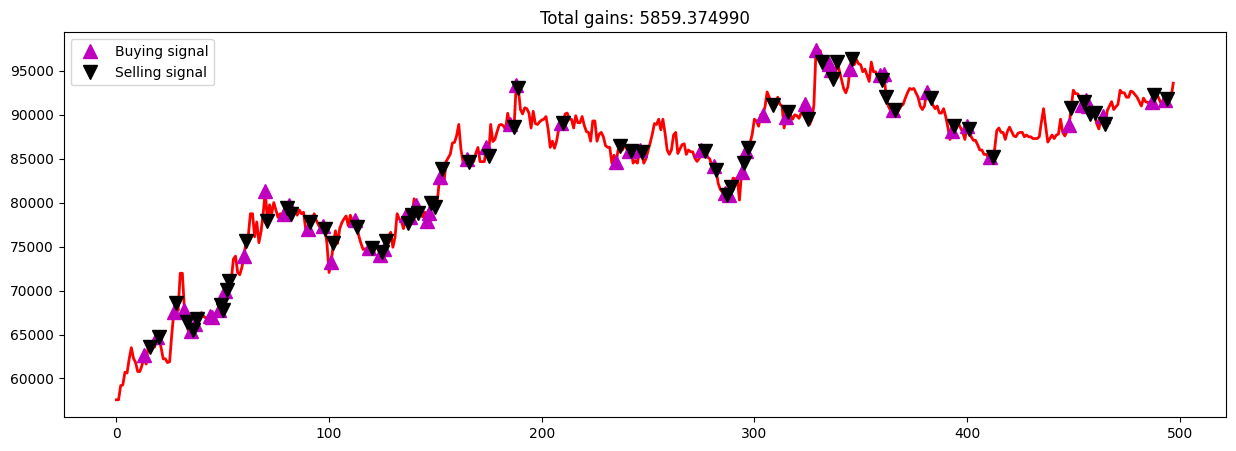

In [20]:
# Define variables to track metrics
total_profit = 0
sharpe_ratio = 0
win_rate = 0
baseline_profit = 0
baseline_sharpe_ratio = 0
baseline_win_rate = 0
num_trades = 0
num_winning_trades = 0

# Define lists to store trade information
states_sell_test = []
states_buy_test = []

# Iterate over the test data
for t in range(l_test):
    # Get the agent's action
    action = agent.act(state)
    next_state = getState(test_data, t + 1, window_size + 1)
    reward = 0

    # Buy action
    if action == 1:
        agent.inventory.append(test_data[t])
        states_buy_test.append(t)
        print("Buy: " + formatPrice(test_data[t]))

    # Sell action
    elif action == 2 and len(agent.inventory) > 0:
        bought_price = agent.inventory.pop(0)
        reward = max(test_data[t] - bought_price, 0)
        total_profit += test_data[t] - bought_price

        # Update trade metrics
        num_trades += 1
        if reward > 0:
            num_winning_trades += 1

        states_sell_test.append(t)
        print("Sell: " + formatPrice(test_data[t]) + " | profit: " + formatPrice(test_data[t] - bought_price))

    # Update agent's memory
    if t == l_test - 1:
        done = True
    agent.memory.append((state, action, reward, next_state, done))
    state = next_state

# Calculate metrics
# Total profit
total_profit = total_profit

# Sharpe ratio
# Assuming risk-free rate is 0 for simplicity
# You may need to adjust this calculation based on your specific context
sharpe_ratio = calculate_sharpe_ratio(test_data, total_profit)

# Win rate
win_rate = num_winning_trades / num_trades if num_trades > 0 else 0

# Comparison with baseline strategy
# Define a baseline strategy (e.g., buy and hold)
baseline_profit = test_data[-1] - test_data[0]  # Profit from buy and hold strategy
baseline_sharpe_ratio = 0  # Adjust this based on your risk-free rate
baseline_win_rate = 0  # No trades in the baseline strategy

# # Print baseline metrics
# print("Baseline Profit: " + formatPrice(baseline_profit))
# print("Baseline Sharpe Ratio: " + str(baseline_sharpe_ratio))
# print("Baseline Win Rate: " + str(baseline_win_rate))

# Print metrics
print("------------------------------------------")
print("Total Profit: " + formatPrice(total_profit))
print("Sharpe Ratio: " + str(sharpe_ratio))
print("Win Rate: " + str(win_rate))
print("Baseline Profit: " + formatPrice(baseline_profit))
print("Baseline Sharpe Ratio: " + str(baseline_sharpe_ratio))
print("Baseline Win Rate: " + str(baseline_win_rate))
print("------------------------------------------")

# Plot behavior
plot_behavior(test_data, states_buy_test, states_sell_test, total_profit)

In [21]:
# Create an empty list to store the trading simulation results
predicted_prices_data = []

# Iterate through the states_buy_test list, considering the corresponding sell action
for i in range(len(states_buy_test)):
    buy_date = states_buy_test[i]
    buy_price = test_data[buy_date]

    # Append buy data
    predicted_prices_data.append([dataset.index[buy_date], 'Buy', buy_price])

    # Check if a corresponding sell action exists
    if i < len(states_sell_test):
        sell_date = states_sell_test[i]
        sell_price = test_data[sell_date]

        # Append sell data
        predicted_prices_data.append([dataset.index[sell_date], 'Sell', sell_price])

# Create the DataFrame
predicted_prices = pd.DataFrame(predicted_prices_data, columns=['Date', 'Buy/Sell', 'Price'])

# Display the DataFrame
#predicted_prices.to_csv('/content/drive/MyDrive/REL301m/data_new/predicted_prices_fpt.csv')

In [22]:
predicted_prices

,Date,Buy/Sell,Price
0,2014-11-20 00:00:00+00:00,Buy,62658.766
1,2014-11-25 00:00:00+00:00,Sell,63590.180
2,2014-11-28 00:00:00+00:00,Buy,64775.613
3,2014-12-01 00:00:00+00:00,Sell,64775.613
4,2014-12-10 00:00:00+00:00,Buy,67569.859
...,...,...,...
119,2016-09-15 00:00:00+00:00,Sell,88900.000
120,2016-10-17 00:00:00+00:00,Buy,91500.000
121,2016-10-18 00:00:00+00:00,Sell,92200.000
122,2016-10-25 00:00:00+00:00,Buy,91700.000


In [24]:
acb_label = read_csv('/content/drive/MyDrive/REL301m/data_new/ACB_label.csv')
fpt_label = read_csv('/content/drive/MyDrive/REL301m/data_new/FPT_label.csv')
vcb_label = read_csv('/content/drive/MyDrive/REL301m/data_new/VCB_label.csv')

In [25]:
# Assuming 'predicted_prices' and 'acb_label' DataFrames are already defined
import pandas as pd

# Convert 'Date' column to datetime objects
predicted_prices['Date'] = pd.to_datetime(predicted_prices['Date'])
acb_label['Date'] = pd.to_datetime(acb_label['Date'])

# Merge the DataFrames based on the 'Date' column
merged_df = pd.merge(predicted_prices, acb_label, on='Date', how='inner')

# Calculate accuracy based on 'Buy/Sell' and 'Label' columns
correct_predictions = 0
total_predictions = 0

for index, row in merged_df.iterrows():
    if row['Buy/Sell'] == 'Buy' and row['label'] == "buy":
        correct_predictions += 1
    elif row['Buy/Sell'] == 'Sell' and row['label'] == 'sell':
        correct_predictions += 1
    total_predictions += 1

accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
print(f"Accuracy based on labels: {accuracy:.2f}%")

# Print the merged DataFrame for verification
merged_df

Accuracy based on labels: 55.65%


,Date,Buy/Sell,Price,Close,High,Low,Open,Volume,label
0,2014-11-20 00:00:00+00:00,Buy,62658.766,3210.251,3230.829,3189.672,3230.829,163712,sell
1,2014-11-25 00:00:00+00:00,Sell,63590.180,3169.094,3210.251,3148.515,3189.672,623678,sell
2,2014-11-28 00:00:00+00:00,Buy,64775.613,3127.937,3189.672,3127.937,3189.672,525152,sell
3,2014-12-01 00:00:00+00:00,Sell,64775.613,3127.937,3169.094,3127.937,3169.094,1192017,sell
4,2014-12-10 00:00:00+00:00,Buy,67569.859,3169.094,3169.094,3148.515,3148.515,628097,sell
...,...,...,...,...,...,...,...,...,...
119,2016-09-15 00:00:00+00:00,Sell,88900.000,3560.086,3580.665,3518.929,3560.086,780376,sell
120,2016-10-17 00:00:00+00:00,Buy,91500.000,3930.500,3951.078,3930.500,3951.078,1870357,sell
121,2016-10-18 00:00:00+00:00,Sell,92200.000,3951.078,3951.078,3909.921,3930.500,2835714,sell
122,2016-10-25 00:00:00+00:00,Buy,91700.000,3951.078,3951.078,3868.764,3909.921,1110036,buy


In [26]:
# Assuming 'merged_df' DataFrame is already created as shown in the original code.

# Filter the DataFrame to show only incorrect predictions
incorrect_predictions = merged_df[
    (merged_df['Buy/Sell'] == 'Buy') & (merged_df['label'] != 'buy') |
    (merged_df['Buy/Sell'] == 'Sell') & (merged_df['label'] != 'sell')
]

print("Incorrect Predictions:")
incorrect_predictions

Incorrect Predictions:


,Date,Buy/Sell,Price,Close,High,Low,Open,Volume,label
0,2014-11-20 00:00:00+00:00,Buy,62658.766,3210.251,3230.829,3189.672,3230.829,163712,sell
2,2014-11-28 00:00:00+00:00,Buy,64775.613,3127.937,3189.672,3127.937,3189.672,525152,sell
4,2014-12-10 00:00:00+00:00,Buy,67569.859,3169.094,3169.094,3148.515,3148.515,628097,sell
6,2014-12-17 00:00:00+00:00,Buy,67739.203,3148.515,3169.094,3107.358,3148.515,1483997,sell
8,2014-12-22 00:00:00+00:00,Buy,65453.008,3148.515,3169.094,3148.515,3169.094,211865,sell
9,2014-12-23 00:00:00+00:00,Sell,65537.680,3189.672,3189.672,3148.515,3148.515,449624,buy
10,2014-12-24 00:00:00+00:00,Buy,66215.070,3189.672,3210.251,3169.094,3189.672,881056,sell
13,2015-01-13 00:00:00+00:00,Sell,68331.922,3395.458,3436.615,3313.144,3313.144,2021542,buy
18,2015-01-15 00:00:00+00:00,Buy,69940.727,3271.987,3333.722,3271.987,3313.144,1190376,sell
19,2015-01-19 00:00:00+00:00,Sell,71126.164,3313.144,3333.722,3292.565,3313.144,1119199,buy


In [27]:
# prompt: kiểm tra code và đánh giá f1-score của data chứng khoán FPT trên tập "train" (không chia label)

from sklearn.metrics import f1_score

# Assuming 'merged_df' DataFrame is already created as shown in the original code.

# Extract true labels and predicted labels
true_labels = merged_df['label'].map({'buy': 1, 'sell': 0, 'hold': 2})  # Map labels to numerical values
predicted_labels = merged_df['Buy/Sell'].map({'Buy': 1, 'Sell': 0})  # Map predictions to numerical values

# Calculate F1-score (ignoring 'hold' predictions)
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"F1-score on training data: {f1:.4f}")


F1-score on training data: 0.5948
